# Program 2 - Modeling A Realistic Curve Ball

In this Program we were tasked with modeling a curve ball with real data. We started our program with the MLB average curveball which had a 79.3 mph velocity, and a spin rate of 2748 rpm. Our hyopthesis revolved around these stats, we believed that the slower the velocity the greater the horizontal and vertical movement, and therefore the greater the velocity the greater amount of spin rate you would need to match the same amount of movement

In this first cell we started by importing the needed ode file as well as our math import of numpy and the graphing import of matplotlib.pyplot

In [60]:
import ode #ode.py should be in the same folder as your notebook
import numpy as np
import matplotlib.pyplot as plt

Here we set our needed parameters and constants. This being the all the dimensions and weight of the baseball as well as other constants like gravity

In [61]:
#parameters
g = 9.8 #N/kg\
rho = 1.2 #kg/m^3
mu = 1.8e-5 #kg/m/s
r = 74e-3/2 #74 mm diameter, 9.25" in circumference
A = np.pi*r**2 #cross-sectional area
Cd = 0.3 #depends on speed
m = 0.145 #kg
#b2 = 1/2*Cd*rho*A #changes as Cd changes

S = 0.01 #will change as omega and v change
CL = 0 #will change with S
#alpha = 1/2*CL*rho*A*r/S


In this cell we declared much of the initial positions and conditions. We start with the velocity and spin rate (these are the stats that we changed to measure the different effects of lower and higher velocity) as well as the conversion from mph and degrees to m/s and radians. We also declare the initial positions and velocities of the baseball and finall declaring our data array for these.

In [65]:
# data for pitch
vmag0mph = 79.3 #mph
thetadeg = -1 #degx
spinrate = 2748 #rpm

# convert units and create initial conditions
vmag0 = vmag0mph*0.44704 #convert mph to m/s
theta = thetadeg*np.pi/180 #convert deg to rad

# initial position and velocity components
x0 = .22
y0 = 0
z0 = 1.88
vx0 = 0 
vy0 = vmag0*np.cos(theta)     
vz0 = vmag0*np.sin(theta) 

# initial angular speed and velocity
omegamag = spinrate * 2*np.pi / 60 #convert to rad/s
omega = np.array([-omegamag, 0, 0])

# array for instantaneous position and velocity data
data = np.array([x0, y0, z0, vx0, vy0, vz0])


In this cell we create a function to calculate and return the derivatives. Here we calculate the velocity, as well as the drag and magnus effect for all axes. We also calculate for the net force in all axes and the derivatives.

In [66]:
def forcesoftheball(d, t):
    """ Calculate and return the derivative of each quantity in an array d at the time t.
   
    Keyword arguments:
    t -- time at the beginning of the time step
    d -- an array of variables at time t
    """
   
    x = d[0]
    y = d[1]
    z = d[2]
    vx = d[3]
    vy = d[4]
    vz = d[5]
   
    dxdt = vx
    dydt = vy
    dzdt = vz
   
    v = np.sqrt(vx**2 + vy**2 + vz**2)
    Fdragx = -1/2*Cd*rho*A*v**2 * vx/v
    Fdragy = -1/2*Cd*rho*A*v**2 * vy/v
    Fdragz = -1/2*Cd*rho*A*v**2 * vz/v
   
    Fgravz = -m*g
    
    S = (r*omegamag)/v
    CL = 0.62*S**0.7
    
    Fmagnusx =  1/2*CL*rho*((A*r)/S)*((omega[0]*vy)-(omega[1]*vx))
    Fmagnusy =  1/2*CL*rho*((A*r)/S)*((omega[1]*vz)-(omega[2]*vy))
    Fmagnusz =  1/2*CL*rho*((A*r)/S)*((omega[2]*vx)-(omega[0]*vz))
    
    Fnetx = Fdragx + Fmagnusx
    Fnety = Fdragy + Fmagnusy
    Fnetz = Fmagnusz + Fgravz
    
    dvxdt = Fnetx/m
    dvydt = Fnety/m
    dvzdt = Fnetz/m   

    derivs = np.array([dxdt, dydt, dzdt, dvxdt, dvydt, dvzdt])
   
    return derivs

Here we declare the time and time step as well as the initial position and velocity for our baseball. We then declare the lists to store our data for the position on all axes as well as the time. Next we run through a while loop that stops when the y value is less that 16.2, and in this loop we use the RK4 method calling our previous funstion to get our values, and finally in this loop we append these values to the end of our lists. Following the loop we use our graphing import to plot the different views of the axes, most importantly the Y value list versus the X Value list.

0.2197017482100671
0.21880871193640145
0.21732345696525196
0.21524853207345632
0.21258646919349142
0.20933978357710342
0.20551097395753926
0.20110252271040024
0.19611689601313886
0.19055654400321895
0.18442390093495964
0.17772138533508264
0.17045140015698246
0.16261633293373884
0.1542185559298899
0.1452604262919852
0.1357442861979364
0.1256724630051837
0.115047269397696
0.10387100353182177
0.09214594918100809
0.07987437587940446
0.06705853906436812
0.053700680217887056
0.0398030270069367
0.025367793422786222
0.010397179919269717
-0.00510662644996244
-0.02114145189519704
-0.037705135755401686
-0.05479553036394413
-0.0724105009152731
-0.09054792533254676
-0.10920569413619498
-0.12838171031340206
-0.1480738891884967
-0.16828015829423615
-0.18899845724397182
-0.2102267376046842
-0.23196296277087405
-0.25420510783929884
-0.2769511594845418
-0.30019911583540226
-0.3239469863520964
-0.34819279170425643
-0.37293456364971794
-0.39817034491408476
-0.42389818907106036


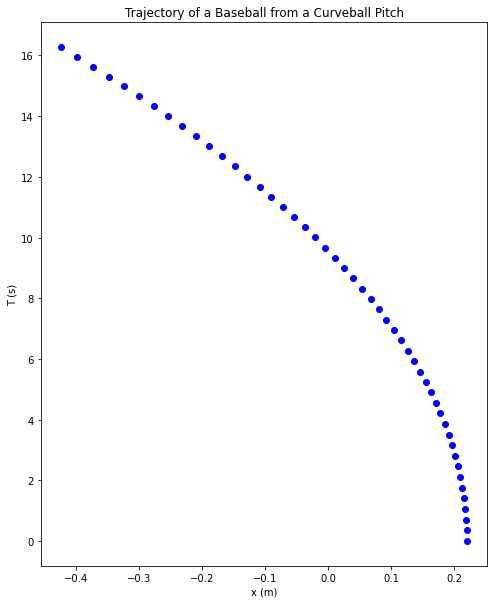

-0.6438981890710603


In [67]:
t = 0 #time in s
h = .01 #time step in s

# initial position and velocity components
x = .22
y = 0
z = 1.88
vx = 0 
vy = vmag0*np.cos(theta)   
vz = vmag0*np.sin(theta)   

# lists for storing data to graph
tlist = []
xlist = []
ylist = []
zlist = []

# store initial values
tlist.append(t)
xlist.append(x)
ylist.append(y)
zlist.append(z)

data = np.array([x,y,z,vx,vy,vz])

# compute
while y < 16.2:
   
    data = ode.RK4(forcesoftheball, data, t, h)
    t = t + h
   
    x = data[0]
    y = data[1]
    z = data[2]
    tlist.append(t)
    xlist.append(x)
    ylist.append(y)
    zlist.append(z)
    print(x)
   
# Plot the trajectory
plt.figure(figsize = (8,10))
plt.title("Trajectory of a Baseball from a Curveball Pitch")
plt.xlabel("x (m)")
plt.ylabel("T (s)")
plt.plot(xlist, ylist, 'bo')
plt.show()

print(xlist[-1]-xlist[0])

Here are our graphs of the Y values versus the X values to while altering our initial velocity as well as testing our initial spin rate

This is calculated with the Velocity of 60 mph and a spin rate of 2748 : 
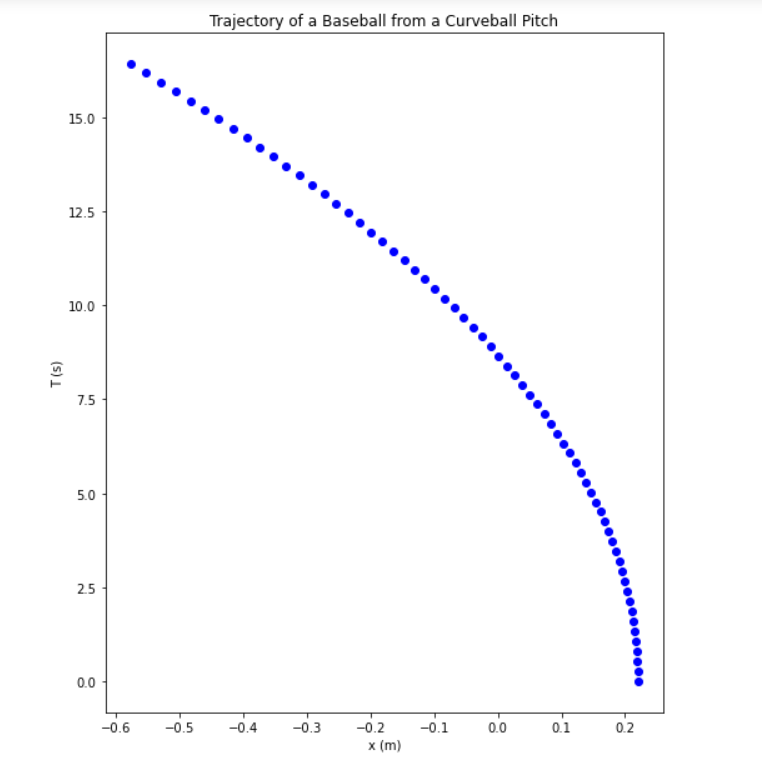

This is calculated with the Velocity of 70 mph and a spin rate of 2748 :
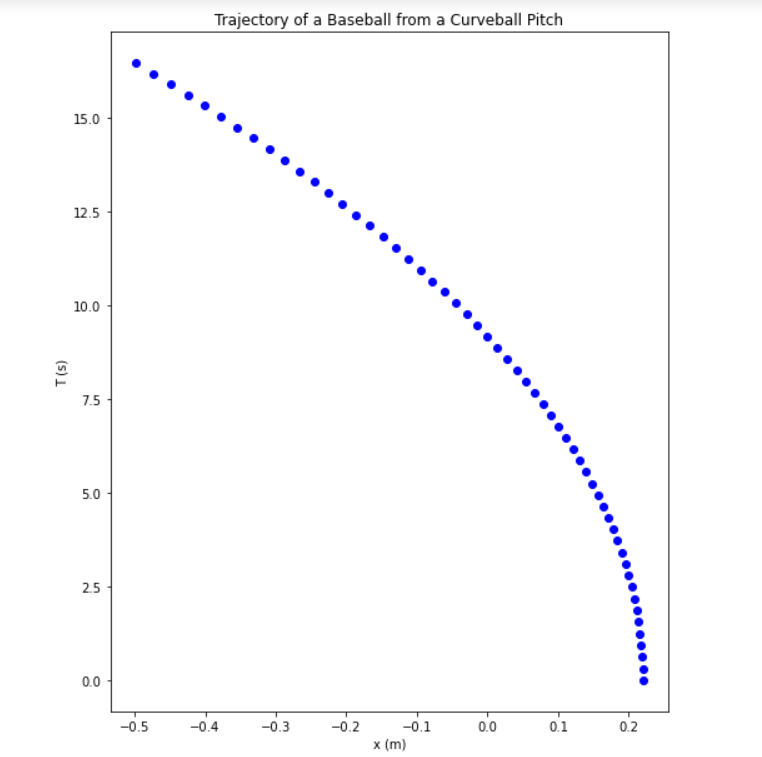

This is calculated with the Velocity of 79.3 mph and a spin rate of 2748 :
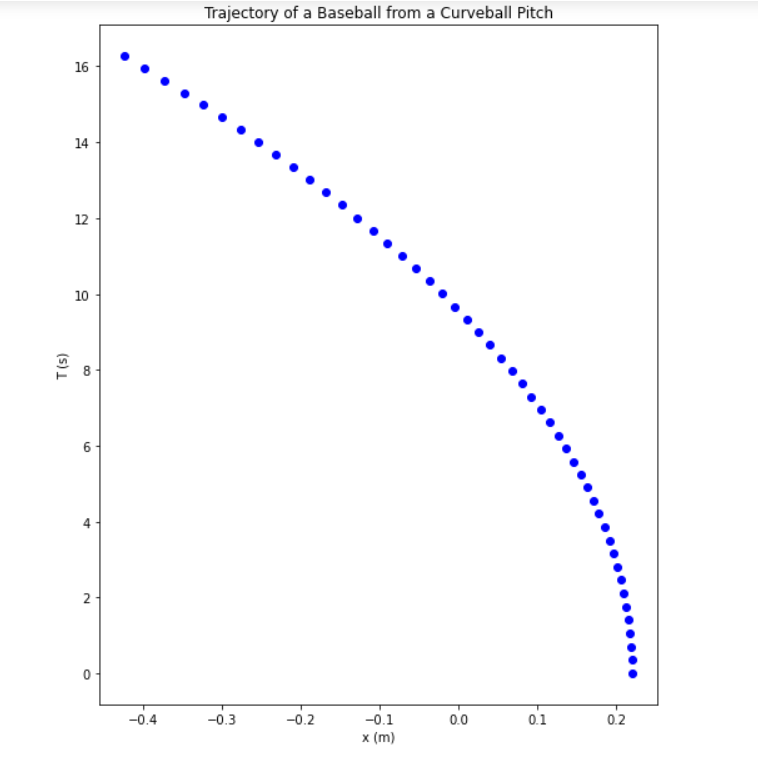

This is calculated with the Velocity of 85 mph and a spin rate of 2748 : 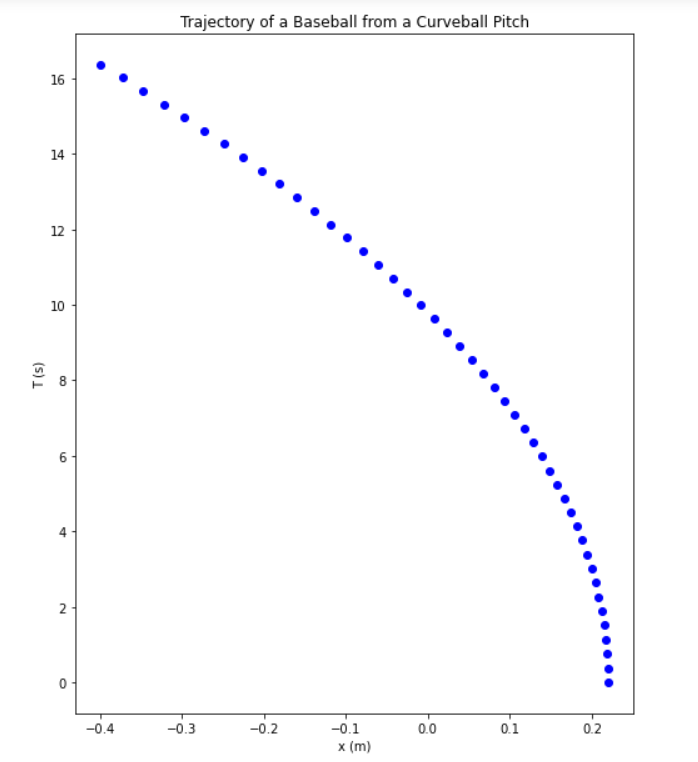
    

Finally this is calculated with the velocity of 85 mph and a spin rate of 3000 : 
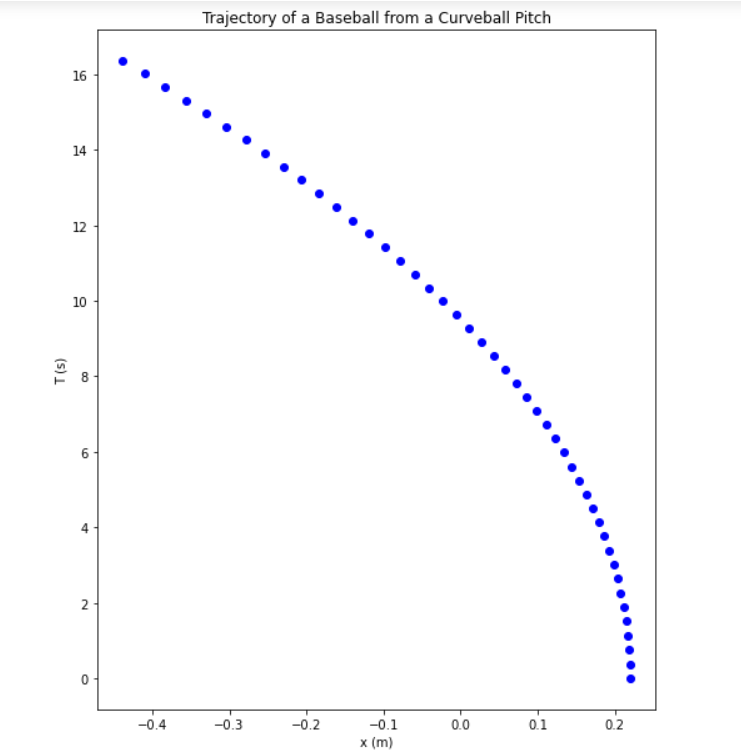

In conclussion using these graphs we were able to determine that our hypothesis is correct and the lower the initial velocity of our pitch increases the horizontal movement of the baseball. We also see that through the fact that as we increase the velocity we need a greater spin rate to get the equal amount of horizontal movement. However just becuase you have greater horizontal movement does not mean it is a better pitch.